### 準確率 (Accuracy)
表示模型正確預測的案例（真陽性和真陰性）占所有案例的比例。公式如下：
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

### 精確率 (Precision)我要找到更多精準找到陽性的人 但可能抓錯人
表示被模型預測為陽性且實際上也為陽性的案例占所有被模型預測為陽性的案例的比例。公式如下：

降低假陽(FP)我提高了病毒的量 並度量要高才算陽 但是有些少量病毒的也因該是陽性所以FN上升
$$ \text{Precision} = \frac{TP}{TP + FP} $$

### 召回率 (Recall) 或稱敏感度 (Sensitivity) 我要找到更多陽性的人
表示被模型預測為陽性且實際上也為陽性的案例占所有實際陽性案例的比例。公式如下：

降低假英(FN)我降低了病毒的量 但是有些少量病毒就算陽 但是這要FP(假陽就可能上升)
$$ \text{Recall} = \frac{TP}{TP + FN} $$

## 精確率 與 召回率 此消彼漲
FP想變小FN有可能多 FN想變小FP可能多這就是 消彼長的關係原因

### F1 Score
為精確率與召回率的調和平均數，是兩者之間的平衡。公式如下：
$$ \text{F1 Score} = \frac{2 \times TP}{2 \times TP + FP + FN} $$

## 預測信用卡詐騙
### 資料:
https://drive.google.com/file/d/1acrq0RJkVElq8jf_8jq0-X2TDcJvxjcf/view?usp=sharing

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
df = pd.read_csv("./creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
X,y = df.drop(["Time","Amount","Class"],axis = 1),df["Class"]
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [3]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [4]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9990871107053826

In [7]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()
tn,fp,fn,tp

(56854, 10, 42, 56)

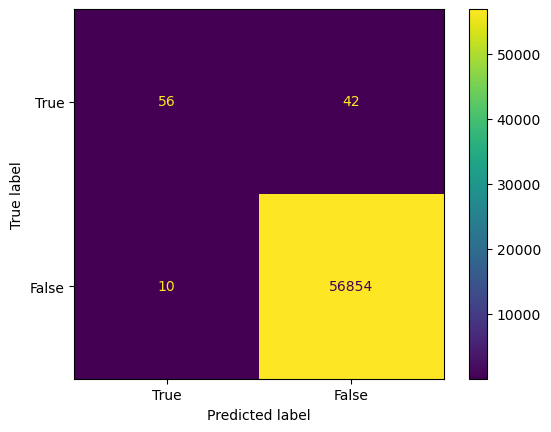

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,labels=[1,0],display_labels=["True","False"])

In [17]:
print(f"準確率",round((tn+tp)/(tn+fp+fn+tp),5) )
print(f"精確率",tp/(fp+tp))
print(f"招回率",tp/(fn+tp))
print(f"f1 score",2*tp/(2 * tp + fp + fn))

準確率 0.99909
精確率 0.8484848484848485
招回率 0.5714285714285714
f1 score 0.6829268292682927


### AUC（曲線下面積）

AUC 是 ROC 曲線下面積，範圍從 0 到 1。AUC 的值可以解釋為模型在隨機挑選一對正負樣本時，正樣本得分高於負樣本的概率。

- **AUC = 1.0**：模型的分類性能非常好，能夠完美地將所有正負樣本區分開來。
- **0.5 < AUC < 1.0**：模型具有一定的區分能力，AUC 值越高，模型性能越好。
- **AUC = 0.5**：模型的分類性能與隨機猜測無異。
- **AUC < 0.5**：模型的分類性能比隨機猜測還差，這種情況通常意味著模型存在嚴重問題。

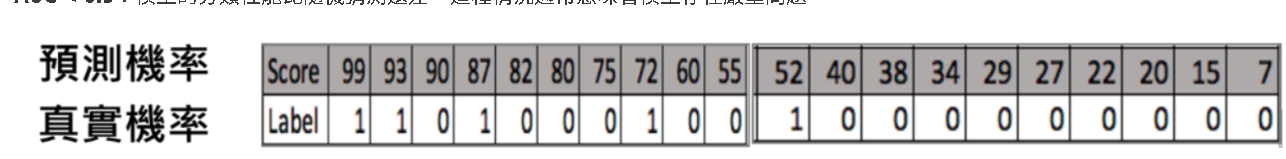
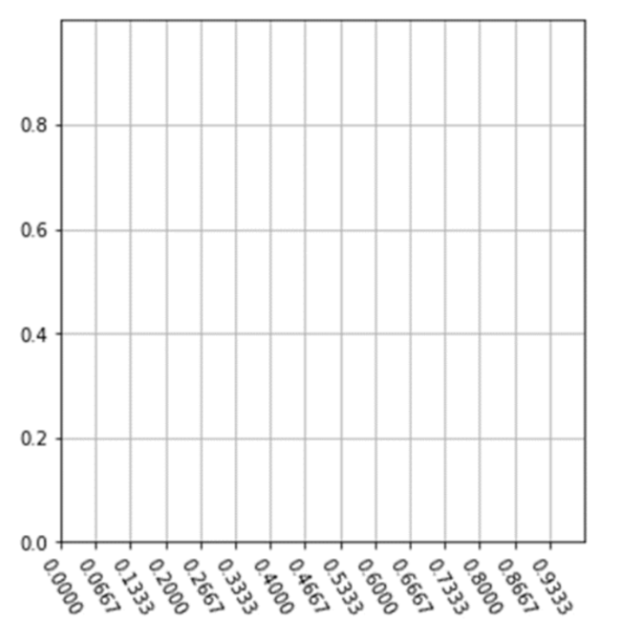
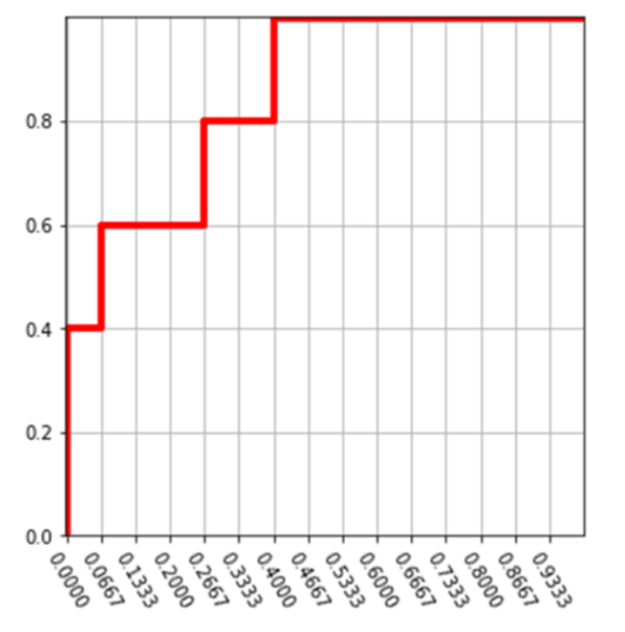

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
df = pd.read_csv("./roc_test_data.csv")
df.head()

,predict,actual
0,0.11,0
1,0.35,0
2,0.72,1
3,0.10,1
4,0.99,1


In [25]:
df = df.sort_values(by="predict",ascending=False)
df.head()

,predict,actual
4,0.99,1
17,0.82,1
7,0.80,1
13,0.73,0
2,0.72,1


In [26]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(df["actual"],df["predict"])
print(fpr,tpr,thresholds)


[0.         0.         0.         0.14285714 0.14285714 0.28571429
 0.28571429 0.57142857 0.57142857 0.71428571 0.71428571 1.        ] [0.         0.09090909 0.27272727 0.27272727 0.63636364 0.63636364
 0.81818182 0.81818182 0.90909091 0.90909091 1.         1.        ] [ inf 0.99 0.8  0.73 0.56 0.48 0.42 0.32 0.22 0.11 0.1  0.03]


In [28]:
auc1 = auc(fpr,tpr)
print(auc1)

0.7792207792207793


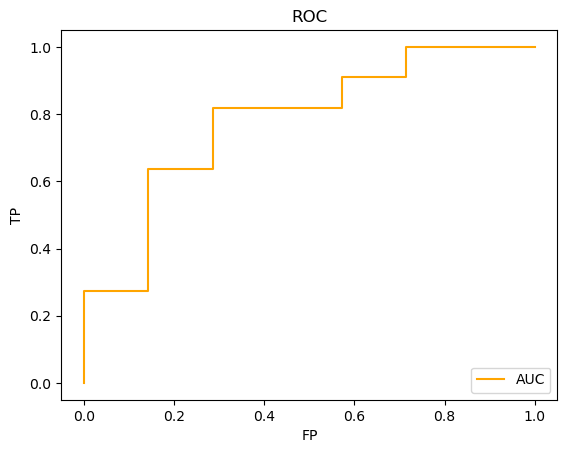

In [29]:
plt.title("ROC")
plt.plot(fpr,tpr,color="orange",label="AUC")
plt.legend(loc="lower right")
plt.xlabel("FP")
plt.ylabel("TP")
plt.show()

## 數據

一項實驗對5000名參與者進行了研究，以研究年齡和身體健康對聽力損失，特別是對聽到高音頻聲音的影響。這些數據顯示了研究的結果，參與者被評估並獲得身體能力分數，然後進行音頻測試（通過/不通過），以評估他們聽到高頻聲音的能力。同時記錄了參與者的年齡。是否有可能根據參與者的特徵（年齡和身體分數）建立一個模型來預測某人聽到高頻聲音的可能性？

* 特徵

    * age - 參與者的年齡（以年為單位）
    * physical_score - 身體測試中獲得的分數

* 標籤/目標

    * test_result - 如果未通過，則為0；如果通過測試，則為1+

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv("./hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


<Axes: xlabel='test_result', ylabel='count'>

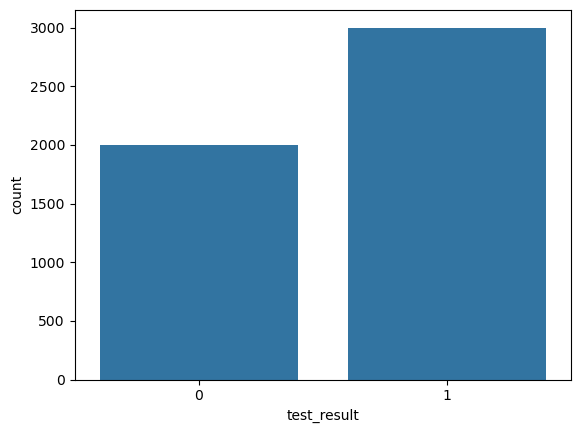

In [32]:
sns.countplot(x="test_result",data=df)

<Axes: xlabel='age', ylabel='physical_score'>

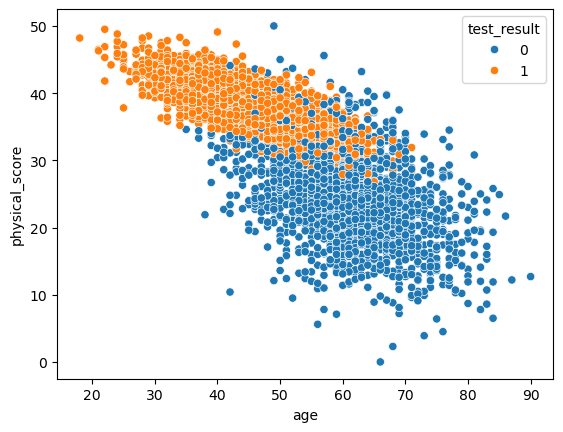

In [33]:
sns.scatterplot(x="age",y="physical_score",hue="test_result",data=df)

<Axes: >

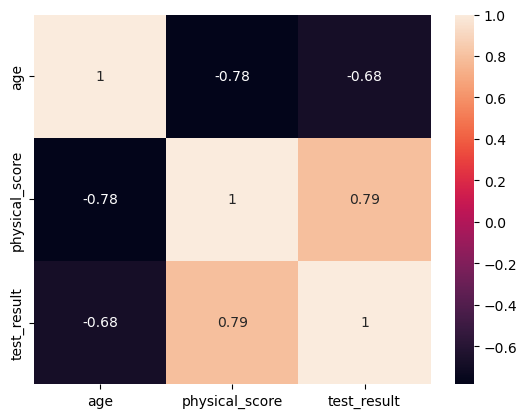

In [35]:
sns.heatmap(df.corr(),annot=True)

In [36]:
X = df.drop("test_result",axis=1)
y = df["test_result"]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)
scaler = StandardScaler()

In [47]:
scaled_X_train  = scaler.fit_transform(X_train)
scaled_X_test  = scaler.transform(X_test)

## Logistic Regression Model

In [49]:
log_mod = LogisticRegression()
log_mod.fit(scaled_X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [52]:
y_pred = log_mod.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.93

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



# Multi-Class Logistic Regression


In [63]:
df = pd.read_csv("./iris.csv")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [64]:
X = df.drop("species",axis=1)
y = df["species"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)
scaler = StandardScaler()
scaled_X_train  = scaler.fit_transform(X_train)
scaled_X_test  = scaler.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier#分類問題轉化為多個二元分類問題

In [66]:
log_mod = LogisticRegression(solver="saga",max_iter=5000)
over_model = OneVsRestClassifier(log_mod)


In [67]:
penalty = ["l1","l2"]
"""
0 表示10^0 = 1 開始
4 表示10^4 = 10000 結束
10 分10斷
指數範圍從10^0 到 10^4平均切10個點
"""
C = np.logspace(0,4,10)
print(C)
#C 越小，正則化強度越大
grid_model = GridSearchCV(over_model, param_grid={'estimator__C': C,
                                                  'estimator__penalty': penalty})
grid_model.fit(scaled_X_train,y_train)

[1.00000000e+00 2.78255940e+00 7.74263683e+00 2.15443469e+01
 5.99484250e+01 1.66810054e+02 4.64158883e+02 1.29154967e+03
 3.59381366e+03 1.00000000e+04]


GridSearchCV(estimator=OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                                        solver='saga')),
             param_grid={'estimator__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'estimator__penalty': ['l1', 'l2']})

In [68]:
y_pred =  grid_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

1.0